# Homework 3
### Name: William Martinez
### Collaborators: None

Due date: May 19, 2024

Submission instructions: 
- __Autograder will not be used for scoring, but you still need to submit the python file converted from this notebook (.py) and the notebook file (.ipynb) to the code submission window.__ 
To convert a Jupyter Notebook (`.ipynb`) to a regular Python script (`.py`):
  - In Jupyter Notebook: File > Download as > Python (.py)
  - In JupyterLab: File > Save and Export Notebook As... > Executable Script
  - In VS Code Jupyter Notebook App: In the toolbar, there is an Export menu. Click on it, and select Python script.
- Submit `hw3.ipynb` and `hw3.py` on Gradescope under the window "Homework 3 - code". Do **NOT** change the file name.
- Convert this notebook into a pdf file and submit it on Gradescope under the window "Homework 3 - PDF". Make sure all your code and text outputs in the problems are visible. 


This homework requires two new packages, `pyarrow` and `duckdb`. Pleas make sure to install them in your `BIOSTAT203C-24S` environment:

```bash
conda activate BIOSTAT203C-24S
conda install -c conda-forge pyarrow python-duckdb
```


## Problem 1. 

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

### (A).

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code, or use posted solutions for HW1. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 




In [14]:
import gzip
import random
import numpy as np
import pandas as pd
import polars as pl
from matplotlib import pyplot as plt

In [2]:
def rw(n):
    pos = 0
    positions = []
    while len(positions) <= n:
      x = random.choice(["heads", "tails"])
      if x == "heads":
          pos += 1
          positions.append(pos)
      elif x == "tails":
          pos -= 1
          positions.append(pos)
    return positions

rw(10)
    

[1, 0, -1, 0, -1, 0, -1, 0, 1, 0, -1]

### (B). 

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- `np.cumsum()`. 


In [3]:
rw2 = lambda n: np.random.choice([-1, 1], size=n, replace=True).cumsum()

rw2(10)


array([-1, -2, -3, -2, -3, -2, -1, -2, -1, -2])

### (C).

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [4]:
%%timeit
rw(10_000)

3.81 ms ± 47.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
rw2(10_000)

61.5 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### (D). 

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

**ANSWER:**
The function, `rw2()`, was 82% faster than the function, `rw()`. Built-in python list operations were used in `rw()` and numpy array operations were used in `rw2()`. The average run-times for `rw()` and `rw2()` were 61.1 µs and 362 µs, respectively. The numpy array operations in `rw2()` were easier to write, occupying only one line, and was more readable than the built-in python list operations in `rw()`

### (E). 


In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 





In [6]:
def rw_d(n, d):
  positions = (np.random.choice([-1, 1], size = (n * d), replace = True)
    .reshape(n, d)
    .cumsum(axis=0)
  )
  return positions
  

rw_d(5, 3)

array([[ 1, -1,  1],
       [ 2, -2,  0],
       [ 3, -1,  1],
       [ 2,  0,  0],
       [ 3,  1,  1]])

### (F).

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

**ANSWER:** Without using numpy tools, Part E could be solved by using a for-loop and performing the `rw()` function d times with an input of n. This would be followed by reshaping into (n,:) shape for each of d iterations. Finally, the reshaped arrays would be concatenated to form an array of shape, (n,d). The resulting function would be approximately 9 lines long (20 lines including `rw()`) and would have a longer runtime than if numpy tools were used. The numpy based function from part E 5-10 times faster than the non-numpy function proposed. Therefore, the utilization of numpy tooling is preferred for its readability and  speed.

### (G).

Once you've implemented `rw_d()`, you can run the following code to generate a large random walk and visualize it. 

```python
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])
```

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

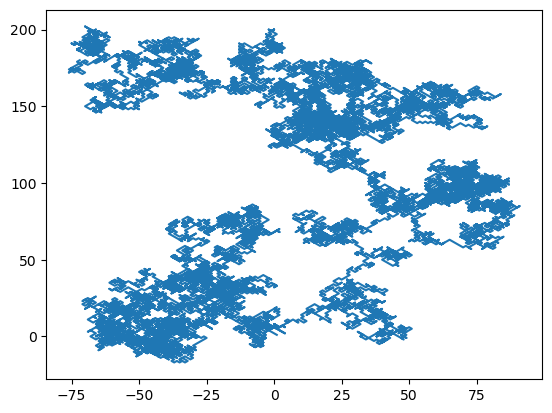

In [7]:
W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])

## Problem 2. Reading MIMIC-IV datafile
In this exercise, we explore various tools for ingesting the [MIMIC-IV](https://mimic.mit.edu/docs/iv/) data introduced in BIOSTAT 203B, but we will do it in Python this time.

Let's display the contents of MIMIC `hosp` and `icu` data folders: (if a cell starts with a `!`, the command is run in the shell.)

In [40]:
# Create a system link to the current directory.
!ls -lh ./mimic/hosp/

total 8859752
-rw-------@ 1 william  staff    15M Jan  5  2023 admissions.csv.gz
-rw-------@ 1 william  staff   417K Jan  5  2023 d_hcpcs.csv.gz
-rw-------@ 1 william  staff   839K Jan  5  2023 d_icd_diagnoses.csv.gz
-rw-------@ 1 william  staff   565K Jan  5  2023 d_icd_procedures.csv.gz
-rw-------@ 1 william  staff    13K Jan  5  2023 d_labitems.csv.gz
-rw-------@ 1 william  staff    24M Jan  5  2023 diagnoses_icd.csv.gz
-rw-------@ 1 william  staff   7.1M Jan  5  2023 drgcodes.csv.gz
-rw-------@ 1 william  staff   485M Jan  5  2023 emar.csv.gz
-rw-------@ 1 william  staff   449M Jan  5  2023 emar_detail.csv.gz
-rw-------@ 1 william  staff   1.7M Jan  5  2023 hcpcsevents.csv.gz
-rw-------@ 1 william  staff   1.8G Jan  5  2023 labevents.csv.gz
-rw-------@ 1 william  staff    92M Jan  5  2023 microbiologyevents.csv.gz
-rw-------@ 1 william  staff    34M Jan  5  2023 omr.csv.gz
-rw-------@ 1 william  staff   2.2M Jan  5  2023 patients.csv.gz
-rw-------@ 1 william  staff   380M Jan  5  2

In [41]:
# Create a system link to the current directory.
!ls -lh ./mimic/icu/

total 6155968
-rw-------@ 1 william  staff    35K Jan  5  2023 caregiver.csv.gz
-rw-------@ 1 william  staff   2.3G Jan  5  2023 chartevents.csv.gz
-rw-------@ 1 william  staff    56K Jan  5  2023 d_items.csv.gz
-rw-------@ 1 william  staff    44M Jan  5  2023 datetimeevents.csv.gz
-rw-------@ 1 william  staff   2.5M Jan  5  2023 icustays.csv.gz
-rw-------@ 1 william  staff   240M Jan  5  2023 ingredientevents.csv.gz
-rw-------@ 1 william  staff   309M Jan  5  2023 inputevents.csv.gz
-rw-------@ 1 william  staff    37M Jan  5  2023 outputevents.csv.gz
-rw-------@ 1 william  staff    20M Jan  5  2023 procedureevents.csv.gz


### (A). Speed, memory, and data types

Standard way to read a CSV file would be using the `read_csv` function of the `pandas` package. Let us check the speed of reading a moderate-sized compressed csv file, `admissions.csv.gz`. How much memory does the resulting data frame use?

_Note:_ If you start a cell with `%%time`, the runtime will be measured. 

In [22]:
%%time
df_pd_adm = pd.read_csv("./mimic/hosp/admissions.csv.gz")
df_pd_adm.head(2)

CPU times: user 772 ms, sys: 74.7 ms, total: 846 ms
Wall time: 865 ms


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0


In [7]:
%%time
df_pl_adm = pl.read_csv("./mimic/hosp/admissions.csv.gz")
df_pl_adm.head(2)

CPU times: user 296 ms, sys: 37.4 ms, total: 333 ms
Wall time: 202 ms


subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,i64
10000032,22595853,"""2180-05-06 22:…","""2180-05-07 17:…",null,"""URGENT""","""P874LG""","""TRANSFER FROM …","""HOME""","""Other""","""ENGLISH""","""WIDOWED""","""WHITE""","""2180-05-06 19:…","""2180-05-06 23:…",0
10000032,22841357,"""2180-06-26 18:…","""2180-06-27 18:…",null,"""EW EMER.""","""P09Q6Y""","""EMERGENCY ROOM…","""HOME""","""Medicaid""","""ENGLISH""","""WIDOWED""","""WHITE""","""2180-06-26 15:…","""2180-06-26 21:…",0


### (B). User-supplied data types

Re-ingest `admissions.csv.gz` by indicating appropriate column data types in [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Does the run time change? How much memory does the result dataframe use? (Hint: `dtype` and `parse_dates` arguments in `pd.read_csv`.)

[**pandas dtypes**](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes):

- The type, `categorical`, was chosen for categorical variables because it's more efficient than `string` ([Pandas: Categorical Data](https://pandas.pydata.org/docs/user_guide/categorical.html))

In [30]:
%%time
#Pandas using category
df_pd_cat_adm = pd.read_csv(
  "./mimic/hosp/admissions.csv.gz",
  dtype={
    'subject_id': 'int64',
    'hadm_id': 'int64',
    'admission_type': 'category',
    'admit_provider_id': 'category',
    'admission_location': 'category',
    'discharge_location': 'category',
    'insurance': 'category',
    'language': 'category',
    'marital_status': 'category',
    'race': 'category',
    'hospital_expire_flag': 'category'
  },
  parse_dates=[
    'admittime',
    'dischtime',
    'deathtime',
    'edregtime',
    'admittime',
    'edouttime',
    'deathtime',
  ]
)
df_pd_str_adm.dtypes

CPU times: user 3.61 s, sys: 103 ms, total: 3.71 s
Wall time: 3.73 s


In [31]:
%%time
# Pandas using String
df_pd_str_adm = pd.read_csv(
  "./mimic/hosp/admissions.csv.gz",
  dtype={
    'subject_id': 'int64',
    'hadm_id': 'int64',
    'admission_type': 'string',
    'admit_provider_id': 'string',
    'admission_location': 'string',
    'discharge_location': 'string',
    'insurance': 'string',
    'language': 'string',
    'marital_status': 'string',
    'race': 'string',
    'hospital_expire_flag': 'string'
  },
  parse_dates=[
    'admittime',
    'dischtime',
    'deathtime',
    'edregtime',
    'admittime',
    'edouttime',
    'deathtime',
  ]
)
df_pd_str_adm.dtypes

CPU times: user 3.7 s, sys: 84 ms, total: 3.79 s
Wall time: 3.81 s


In [8]:
%%time
#Pandas using category
df_pl_cat_adm = pl.read_csv(
  "./mimic/hosp/admissions.csv.gz",
  dtypes={
    'subject_id': pl.Int64,
    'hadm_id': pl.Int64,
    'admission_type': pl.Categorical,
    'admit_provider_id': pl.Categorical,
    'admission_location': pl.Categorical,
    'discharge_location': pl.Categorical,
    'insurance': pl.Categorical,
    'language': pl.Categorical,
    'marital_status': pl.Categorical,
    'race': pl.Categorical,
    'hospital_expire_flag': pl.Categorical
  },
  try_parse_dates=True
)
df_pl_cat_adm.dtypes

CPU times: user 347 ms, sys: 35.9 ms, total: 383 ms
Wall time: 195 ms


## Problem 3. Ingest big data files


Let us focus on a bigger file, `labevents.csv.gz`, which is about 125x bigger than `admissions.csv.gz`.

In [39]:
# Create System Link for mimic in working directory.
!ls -lh ./mimic/hosp/labevents.csv.gz

-rw-------@ 1 william  staff   1.8G Jan  5  2023 ./mimic/hosp/labevents.csv.gz


Display the first 10 lines of this file.

In [43]:
!zcat < ./mimic/hosp/labevents.csv.gz | head -10

labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
1,10000032,,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.4,,0.9,1.1,abnormal,ROUTINE,
2,10000032,,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.1,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
3,10000032,,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15,ng/mL,30,60,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ACCURATELY.
4,10000032,,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102,IU/L,0,40,abnormal,ROUTINE,
5,10000032,,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.3,g/dL,3.5,5.2,abnormal,ROUTINE,
6,10000032,,52958335,50863,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,109,109,IU/L,35,105,abnormal,ROUTINE,
7,10000032,,52958335,50864,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,___,8,ng/mL,0,8.7,,ROUTI

### (A). Ingest `labevents.csv.gz` by `pd.read_csv`

Try to ingest `labevents.csv.gz` using `pd.read_csv`. What happens? If it takes more than 5 minutes on your computer, then abort the program and report your findings. 

In [45]:
%%time
#Pandas
df_pd_lab = pd.read_csv("./mimic/hosp/labevents.csv.gz")
df_pd_lab.head(2)

CPU times: user 1min 49s, sys: 33.4 s, total: 2min 22s
Wall time: 3min 21s


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.4,NaN,0.9,1.1,abnormal,ROUTINE,NaN
1,2,10000032,NaN,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.1,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.


In [46]:
%%time
#Polars:
df_pl_lab = pl.read_csv("./mimic/hosp/labevents.csv.gz")
df_pl_lab.head(2)

CPU times: user 52.4 s, sys: 17.1 s, total: 1min 9s
Wall time: 53.2 s


labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
i64,i64,str,i64,i64,str,str,str,str,f64,str,f64,f64,str,str,str
1,10000032,null,45421181,51237,"""P28Z0X""","""2180-03-23 11:…","""2180-03-23 15:…","""1.4""",1.4,null,0.9,1.1,"""abnormal""","""ROUTINE""",null
2,10000032,null,45421181,51274,"""P28Z0X""","""2180-03-23 11:…","""2180-03-23 15:…","""___""",15.1,"""sec""",9.4,12.5,"""abnormal""","""ROUTINE""","""VERIFIED."""


**ANSWER**

### (B). Ingest selected columns of `labevents.csv.gz` by `pd.read_csv`

Try to ingest only columns `subject_id`, `itemid`, `charttime`, and `valuenum` in `labevents.csv.gz` using `pd.read_csv`.  Does this solve the ingestion issue? (Hint: `usecols` argument in `pd.read_csv`.)

In [50]:
%%time
#Pandas
df_pd_lab = pd.read_csv(
  "./mimic/hosp/labevents.csv.gz",
  usecols=[
    'subject_id',
    'itemid',
    'charttime',
    'valuenum'
  ]
)
df_pd_lab.head(2)

CPU times: user 1min 4s, sys: 4.56 s, total: 1min 9s
Wall time: 1min 11s


,subject_id,itemid,charttime,valuenum
0,10000032,51237,2180-03-23 11:51:00,1.4
1,10000032,51274,2180-03-23 11:51:00,15.1


In [2]:
%%time
#Polars:
df_pl_lab = pl.read_csv(
  "./mimic/hosp/labevents.csv.gz",
  columns=[
    'subject_id',
    'itemid',
    'charttime',
    'valuenum'
  ]
)
df_pl_lab.head(2)

CPU times: user 31.4 s, sys: 10.9 s, total: 42.3 s
Wall time: 37.1 s


subject_id,itemid,charttime,valuenum
i64,i64,str,f64
10000032,51237,"""2180-03-23 11:…",1.4
10000032,51274,"""2180-03-23 11:…",15.1


### (C). Ingest subset of `labevents.csv.gz`

Back in BIOSTAT 203B, our first strategy to handle this big data file was to make a subset of the `labevents` data.  Read the [MIMIC documentation](https://mimic.mit.edu/docs/iv/modules/hosp/labevents/) for the content in data file `labevents.csv.gz`.

As before, we will only be interested in the following lab items: creatinine (50912), potassium (50971), sodium (50983), chloride (50902), bicarbonate (50882), hematocrit (51221), white blood cell count (51301), and glucose (50931) and the following columns: `subject_id`, `itemid`, `charttime`, `valuenum`. 

Rerun the Bash command to extract these columns and rows from `labevents.csv.gz` and save the result to a new file `labevents_filtered.csv.gz` in the current working directory (Q2.3 of HW2). How long does it take?

Display the first 10 lines of the new file `labevents_filtered.csv.gz`. How many lines are in this new file? How long does it take `pd.read_csv()` to ingest `labevents_filtered.csv.gz`?


In [9]:
%%bash
time(zcat < ./mimic/hosp/labevents.csv.gz | \
  awk -F, \
  'BEGIN {OFS = ","} {if (NR == 1 || $5 == 50912 || $5 == 50971 ||
    $5 == 50983 || $5 == 50902 || $5 == 50882 || $5 == 51221 || 
    $5 == 51301 || $5 == 50931) {print $2, $5, $7, $10}}' | \
  gzip > labevents_filtered.csv.gz)
echo "complete"


real	5m19.966s
user	5m45.702s
sys	0m3.291s


complete


In [23]:
%%time
df_pl_lab_filter = (
  pl.read_csv(
    "./mimic/hosp/labevents.csv.gz",
    columns=[
      'subject_id',
      'itemid',
      'charttime',
      'valuenum'
    ]
  )
  .filter(
    (pl.col('itemid') == 50912) |
    (pl.col('itemid') == 50971) |
    (pl.col('itemid') == 50983) |
    (pl.col('itemid') == 50902) |
    (pl.col('itemid') == 50882) |
    (pl.col('itemid') == 51221)
  )
)

with gzip.open("./pl_labevents_filtered.csv.gz", 'wb') as f:
    df_pl_lab_filter.write_csv(f)

CPU times: user 1min 13s, sys: 19.1 s, total: 1min 32s
Wall time: 1min 45s


In [24]:
df_pl_lab_filter_check = pl.read_csv("./pl_labevents_filtered.csv.gz")
df_bash_lab_filter_check = pl.read_csv("./pl_labevents_filtered.csv.gz")
print(df_pl_lab_filter_check.shape == df_bash_lab_filter_check.shape)

True


### (D). Review

Write several sentences on what Apache Arrow, the Parquet format, and DuckDB are. Imagine you want to explain it to a layman in an elevator, as you did before. (It's OK to copy-paste the sentences from your previous submission.)

Also, now is the good time to review [basic SQL commands](https://ucla-biostat-203b.github.io/2024winter/slides/12-dbplyr/dbintro.html) covered in BIOSTAT 203B.

### (E). Ingest `labevents.csv.gz` by Apache Arrow

Our second strategy again is to use [Apache Arrow](https://arrow.apache.org/) for larger-than-memory data analytics. We will use the package `pyarrow`. Unlike in R, this package works with the `csv.gz` format. We don't need to decompress the data. We could just use `dplyr` verbs in R, but here, we need a different set of commands. The core idea behind the commands are still the same, though.

- Let's use [`pyarrow.csv.read_csv`](https://arrow.apache.org/docs/python/generated/pyarrow.csv.read_csv.html) to ingest `labevents.csv.gz`. It creates an object of type [`pyarrow.Table`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html).

- Next, select columns using the [`select()`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.select) method. 

- As in (C), filter the rows based on the column `itemid` using the [`filter()`](https://arrow.apache.org/docs/python/generated/pyarrow.Table.html#pyarrow.Table.filter) method. It is strongly recommended to use [`Expression`](https://arrow.apache.org/docs/python/generated/pyarrow.dataset.Expression), in particular, the `isin()` method. 

- Finally, let's obtain the result in `pandas` `DataFrame` using the method `to_pandas()`. 

How long does the ingest+select+filter process take? Display the number of rows and the first 10 rows of the result dataframe, and make sure they match those of (C).

### (F). Compress `labevents.csv.gz` to Parquet format and ingest/select/filter


Re-write the csv.gz file `labevents.csv.gz` in the binary Parquet format (Hint: [`pyarrow.parquet.write_table`](https://arrow.apache.org/docs/python/generated/pyarrow.parquet.write_table.html).) How large is the Parquet file(s)? 

How long does the ingest+select+filter process of the Parquet file(s) take?  
Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in (C). 

__This should be significantly faster than all the previous results.__ 
_Hint._ Use [`pyarrow.parquet.read_table`](https://arrow.apache.org/docs/python/generated/pyarrow.parquet.read_table.html) method with the keyword argument `columns`. Also, make sure that you are using an `Expression`. 

### (G). DuckDB

Let's use `duckdb` package in Python to use the DuckDB interface. In Python, DuckDB can interact smoothly with `pandas` and `pyarrow`. I recommend reading: 

- https://duckdb.org/2021/05/14/sql-on-pandas.html
- https://duckdb.org/docs/guides/python/sql_on_arrow.html

In Python, you will mostly use SQL commands to work with DuckDB. Check out the [data ingestion API](https://duckdb.org/docs/api/python/data_ingestion).


Ingest the Parquet file, select columns, and filter rows as in (F). How long does the ingest+select+filter process take? Please make sure to call `.df()` method to have the final result as a `pandas` `DataFrame`. Display the number of rows and the first 10 rows of the result dataframe and make sure they match those in (C). 

__This should be significantly faster than the results before (but not including) Part (F).__ 
_Hint_: It could be a single SQL command.


## Problem 4. Ingest and filter `chartevents.csv.gz`

[`chartevents.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/chartevents/) contains all the charted data available for a patient. During their ICU stay, the primary repository of a patient’s information is their electronic chart. The `itemid` variable indicates a single measurement type in the database. The `value` variable is the value measured for `itemid`. The first 10 lines of `chartevents.csv.gz` are


In [7]:
!zcat < physionet.org/files/mimiciv/2.2/icu/chartevents.csv.gz | head -10

subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220179,82,82,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220180,59,59,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 21:01:00,2180-07-23 22:15:00,220181,63,63,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220045,94,94,bpm,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220179,85,85,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220180,55,55,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220181,62,62,mmHg,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220210,20,20,insp/min,0
10000032,29079034,39553978,47007,2180-07-23 22:00:00,2180-07-23 22:15:00,220277,95,95,%,0
zcat: error writing to output: Broken pipe


[`d_items.csv.gz`](https://mimic.mit.edu/docs/iv/modules/icu/d_items/) is the dictionary for the `itemid` in `chartevents.csv.gz`.

In [8]:
!zcat < physionet.org/files/mimiciv/2.2/icu/d_items.csv.gz | head -10

itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
220001,Problem List,Problem List,chartevents,General,,Text,,
220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,,Date and time,,
220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,,
220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,,
220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,,
220048,Heart Rhythm,Heart Rhythm,chartevents,Routine Vital Signs,,Text,,
220050,Arterial Blood Pressure systolic,ABPs,chartevents,Routine Vital Signs,mmHg,Numeric,90,140
220051,Arterial Blood Pressure diastolic,ABPd,chartevents,Routine Vital Signs,mmHg,Numeric,60,90
220052,Arterial Blood Pressure mean,ABPm,chartevents,Routine Vital Signs,mmHg,Numeric,,
zcat: error writing to output: Broken pipe


Again, we are interested in the vitals for ICU patients: heart rate (220045), mean non-invasive blood pressure (220181), systolic non-invasive blood pressure (220179), body temperature in Fahrenheit (223761), and respiratory rate (220210). Retrieve a subset of `chartevents.csv.gz` only containing these items, using the favorite method you learnt in Problem 3. 

Document the steps and show your code. Display the number of rows and the first 10 rows of the result `DataFrame`.